## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **EXPLORATORY DATA ANALYSIS INVOLVED**

>







# **IMPORT OF LIBRARIES AND KNOW  YOUR DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            
                            


In [ ]:
# load google app review data into dataframe
df = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
dfr = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")

In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# df.tail() provide us five records data from end 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# it gives data about count, mean  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# look for the random 10 records
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6639,Wherever BQ,TRAVEL_AND_LOCAL,NaN,7,18M,50+,Free,0,Teen,Travel & Local,"September 5, 2017",5.63.0,4.0.3 and up
6652,Camera FV-5,PHOTOGRAPHY,3.8,16317,Varies with device,"100,000+",Paid,$3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
9582,Stick 'Em Up 2 Starter Edition,GAME,3.8,2102,40M,"100,000+",Free,0,Everyone 10+,Action,"September 11, 2015",1.1.3,4.0.3 and up
9777,FAHREDDİN er-RÂZİ TEFSİRİ,BOOKS_AND_REFERENCE,NaN,9,20M,"1,000+",Free,0,Everyone,Books & Reference,"March 19, 2018",1.1,4.0.3 and up
4487,Pixel Oreo/P Dark White AMOLED UI - Icon Pack,PERSONALIZATION,4.8,18,16M,"5,000+",Paid,$1.49,Everyone,Personalization,"June 21, 2018",5.1,4.0.3 and up
5365,i am rich,BUSINESS,3.9,213,2.9M,"1,000+",Free,0,Everyone,Business,"June 9, 2018",1.0,4.0 and up
262,ClickMeeting Webinars,BUSINESS,3.8,5211,26M,"1,000,000+",Free,0,Everyone,Business,"July 30, 2018",3.3.0,4.0 and up
2877,Sweet Camera,PHOTOGRAPHY,4.4,71898,23M,"5,000,000+",Free,0,Everyone,Photography,"October 10, 2017",6.1.7.100920,4.0.3 and up
6026,BD All Results,FAMILY,4.1,205,7.3M,"50,000+",Free,0,Everyone,Education,"November 29, 2017",9.0,4.0.3 and up
2174,Steam: Rails to Riches,FAMILY,4.2,214,67M,"5,000+",Paid,$4.99,Everyone,Board;Brain Games,"December 13, 2017",3.3.1,4.1 and up


In [ ]:
# for finding what are the types of Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
df['Rating'].mode()


0    4.4
dtype: float64

In [ ]:
df['Rating'].median()

4.3

#**DATA CLEANING** 

In [ ]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2791,Newegg Mobile,SHOPPING,4.5,35497.0,16.0,"1,000,000+",Free,0.00,Everyone,Shopping,"July 11, 2018",4.16.0,4.4 and up
7911,Tropical Financial CU,FINANCE,4.6,1231.0,14.0,"10,000+",Free,0.00,Everyone,Finance,"June 12, 2018",5.9.1.0,5.0 and up
6899,BlitzWolf Shutter - BW Shutter,PHOTOGRAPHY,2.9,333.0,1.8,"50,000+",Free,0.00,Everyone,Photography,"November 22, 2017",1.8.0,4.0 and up
9349,SDA Sabbath School Quarterly,BOOKS_AND_REFERENCE,4.7,14773.0,6.4,"500,000+",Free,0.00,Everyone,Books & Reference,"October 9, 2017",4.1.92,3.0 and up
7227,CE SODEXO PASS FRANCE,PRODUCTIVITY,NaN,0.0,21.0,50+,Free,0.00,Everyone,Productivity,"June 6, 2018",2.3,4.1 and up
10298,FD Calculator | Term Deposit | Fixed Deposit,FINANCE,4.8,12.0,2.7,"1,000+",Free,0.00,Everyone,Finance,"June 13, 2018",2.1,5.0 and up
5973,Baby Connect (activity log),PARENTING,4.7,8343.0,8.3,"50,000+",Paid,4.99,Everyone,Parenting,"July 10, 2018",6.3.16,4.0.3 and up
3305,Unit Converter,TOOLS,4.5,85387.0,5.4,"1,000,000+",Free,0.00,Everyone,Tools,"July 3, 2018",2.1.54,4.0 and up
167,English to Urdu Dictionary,BOOKS_AND_REFERENCE,4.6,4620.0,19.0,"500,000+",Free,0.00,Everyone,Books & Reference,"November 23, 2017",2.0,4.0.3 and up
81,PakWheels: Buy & Sell Cars,AUTO_AND_VEHICLES,4.4,15168.0,37.0,"1,000,000+",Free,0.00,Everyone,Auto & Vehicles,"July 27, 2018",10.0.2,4.2 and up


In [ ]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [ ]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [ ]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [ ]:
print(df['Content Rating'].agg('count'))

10839


In [ ]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# **DATA VISUALIZATION**

# 11. TOTAL PRICE IN EACH CATEGORY(SUM)

In [ ]:
# category wise priec:

cat_price = df.groupby('Category')
y=cat_price['Price'].agg(np.sum)
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

Text(0, 0.5, 'Price')

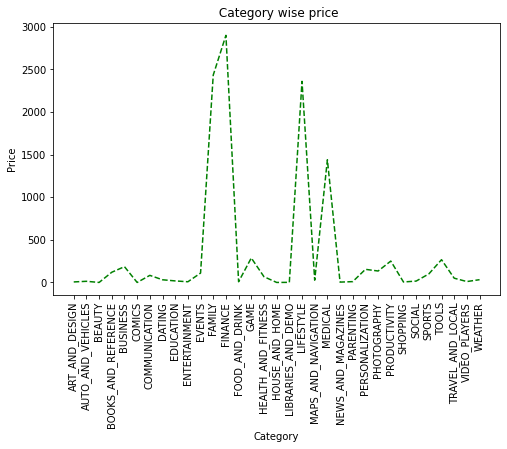

In [ ]:
plt.figure(figsize =(8,5))
plt.plot(y,'r--',color = "green")
plt.xticks(rotation = 90)
plt.title(" Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")

from above figure , we see that "finance" Category has high price as compared to others.


# 12. WHAT IS THE FREE AND PAID APPS SIZE (IN MB)

In [ ]:
df.groupby('Type')['Size'].mean()

Type
Free    18.207730
Paid    17.472417
Name: Size, dtype: float64

Text(0.5, 0, 'TYPE')

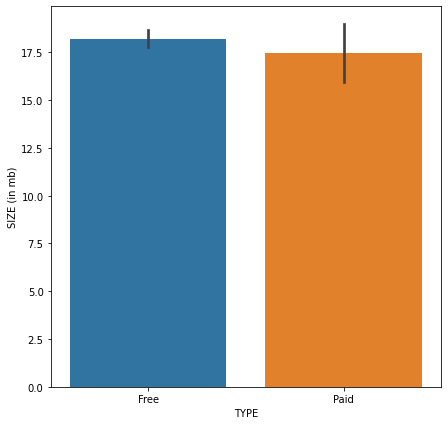

In [ ]:
plt.figure(figsize = (7,7))
sns.barplot(x='Type', y='Size', data=df,estimator=np.mean)
plt.ylabel("SIZE (in mb)")
plt.xlabel("TYPE")

# 13. DATA SHAPE

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.179288,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.479960,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


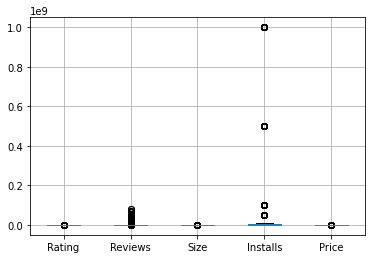

In [ ]:
df.boxplot()

In [ ]:
print(df['Size'].corr(df['Installs']))

-0.00346790732976557


#14. DISTRIBUTION OF RATING

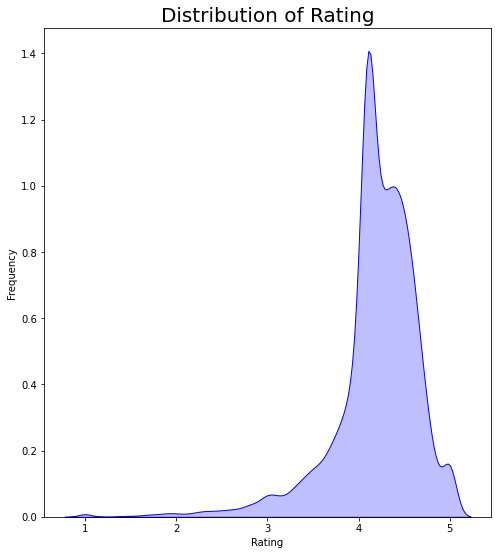

In [ ]:
plt.figure(figsize=(8,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

#15. POINT PLOT OF AVERAGE RATING IN EACH CATEGORY

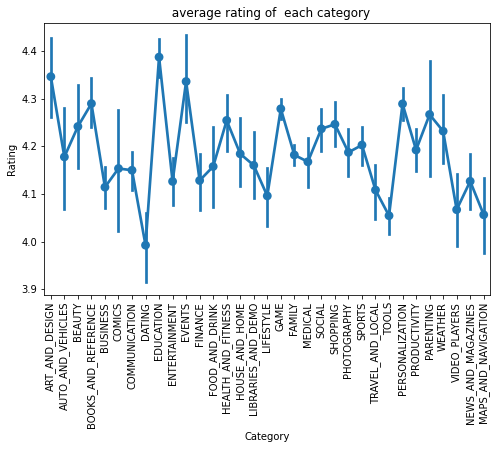

In [ ]:
# plot point plot for average rating of each category

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [ ]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
